In [1]:
#reading data from pc
import pandas as pd
movie_data=pd.read_csv('C:/Users/RAM/Desktop/movie data.csv')
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [3]:
#considering only the required firelds from data set
movie_data=movie_data[['title','tagline','overview','budget','popularity']]
print("DImension of the dataset:", movie_data.shape)

DImension of the dataset: (4803, 5)


In [4]:
#checking for null data
print("number of missing values in columns:\n",movie_data.isnull().sum())

number of missing values in columns:
 title           0
tagline       844
overview        3
budget          0
popularity      0
dtype: int64


In [5]:
#removing missing values
movie_data.dropna(inplace=True)
print("Dimension of new data set", movie_data.shape)

Dimension of new data set (3959, 5)


In [6]:
##Creating new column named information by joining two columns: overview and tagline.
movie_data['information']=movie_data['overview']+ '' + movie_data['tagline']
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 4801
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        3959 non-null   object 
 1   tagline      3959 non-null   object 
 2   overview     3959 non-null   object 
 3   budget       3959 non-null   int64  
 4   popularity   3959 non-null   float64
 5   information  3959 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 216.5+ KB


In [7]:
#making data in descending order so we can find high budget movies in order
highbudget_movies=movie_data.sort_values(by='budget', ascending=False)
print("High Budget movies\n", highbudget_movies['title'].head())


High Budget movies
 17    Pirates of the Caribbean: On Stranger Tides
1        Pirates of the Caribbean: At World's End
7                         Avengers: Age of Ultron
4                                     John Carter
6                                         Tangled
Name: title, dtype: object


In [8]:
highbudget_movies.head()


,title,tagline,overview,budget,popularity,information
17,Pirates of the Caribbean: On Stranger Tides,Live Forever Or Die Trying.,Captain Jack Sparrow crosses paths with a woma...,380000000,135.413856,Captain Jack Sparrow crosses paths with a woma...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",300000000,139.082615,"Captain Barbossa, long believed to be dead, ha..."
7,Avengers: Age of Ultron,A New Age Has Come.,When Tony Stark tries to jumpstart a dormant p...,280000000,134.279229,When Tony Stark tries to jumpstart a dormant p...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...",260000000,43.926995,"John Carter is a war-weary, former military ca..."
6,Tangled,They're taking adventure to new lengths.,When the kingdom's most wanted-and most charmi...,260000000,48.681969,When the kingdom's most wanted-and most charmi...


In [16]:
H=highbudget_movies[['title','budget']]
H

,title,budget
17,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
7,Avengers: Age of Ultron,280000000
4,John Carter,260000000
6,Tangled,260000000
...,...,...
3501,Julia,0
3503,Lake of Fire,0
3505,Men of War,0
3506,Don McKay,0


In [18]:
B=H.iloc[0:6,0:2]
B

,title,budget
17,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
7,Avengers: Age of Ultron,280000000
4,John Carter,260000000
6,Tangled,260000000
5,Spider-Man 3,258000000


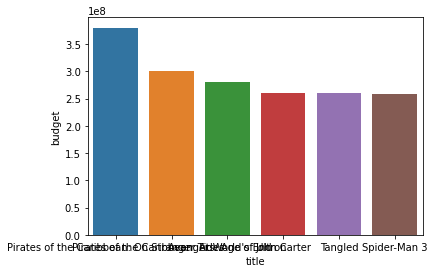

In [19]:
import seaborn as sns
a = sns.barplot(x= 'title', y='budget', data= B)

In [20]:
#now by popuparity we are filtering it in descending order
popular_movies = movie_data.sort_values(by='popularity', ascending=False)
print("Popular Movies:\n",popular_movies['title'].head())
popular_movies

Popular Movies:
 546                    Minions
95                Interstellar
788                   Deadpool
94     Guardians of the Galaxy
127         Mad Max: Fury Road
Name: title, dtype: object


,title,tagline,overview,budget,popularity,information
546,Minions,"Before Gru, they had a history of bad bosses","Minions Stuart, Kevin and Bob are recruited by...",74000000,875.581305,"Minions Stuart, Kevin and Bob are recruited by..."
95,Interstellar,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,165000000,724.247784,Interstellar chronicles the adventures of a gr...
788,Deadpool,Witness the beginning of a happy ending,Deadpool tells the origin story of former Spec...,58000000,514.569956,Deadpool tells the origin story of former Spec...
94,Guardians of the Galaxy,All heroes start somewhere.,"Light years from Earth, 26 years after being a...",170000000,481.098624,"Light years from Earth, 26 years after being a..."
127,Mad Max: Fury Road,What a Lovely Day.,An apocalyptic story set in the furthest reach...,150000000,434.278564,An apocalyptic story set in the furthest reach...
...,...,...,...,...,...,...
4305,Down & Out With The Dolls,Ain't Rock 'N' Roll a bitch.,"The raunchy, spunky tale of the rise and fall ...",0,0.002386,"The raunchy, spunky tale of the rise and fall ..."
4509,Love Letters,Sometimes It's Right To Do the Wrong Thing.,A story of love and obsession. A young radio p...,550000,0.001586,A story of love and obsession. A young radio p...
4625,Midnight Cabaret,The hot spot where Satan's waitin'.,A Broadway producer puts on a play with a Devi...,0,0.001389,A Broadway producer puts on a play with a Devi...
4727,Penitentiary,"There's only one way out, and 100 fools stand ...",A hitchhiker named Martel Gordone gets in a fi...,0,0.001117,A hitchhiker named Martel Gordone gets in a fi...


In [22]:
P=popular_movies[['title','popularity']]
P


,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564
...,...,...
4305,Down & Out With The Dolls,0.002386
4509,Love Letters,0.001586
4625,Midnight Cabaret,0.001389
4727,Penitentiary,0.001117


In [24]:
C=P.iloc[0:6,0:2]
C

,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564
28,Jurassic World,418.708552


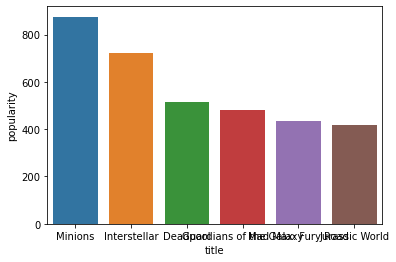

In [25]:
b = sns.barplot(x= 'title', y='popularity', data= C)

# Explanation
The details of the data set are 3959 rows and 5 columns, namely title, tagline, overview, budjet, popularity and inforation
the data show the top five high budget movies, and the top 5 popular movies

In [37]:
#data preprocessing 
#importing necessary libraries
import nltk
import re
import numpy as np
nltk.download('stopwords')
stop_words=nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
#creating function for text processing
def func_txt_process(doctument):
    #converting to lower case
    doctument=doctument.lower()
    doctument = re.sub(r'[^a-zA-Z0-9\s]', '',doctument,re.I|re.A)
    doctument = doctument.strip()
    #tokenization of the doctument
    tokens = nltk.word_tokenize(doctument)
    #filter stop words out of doctument
    filtered_tokens=[token for token in tokens if token not in stop_words]
    #create doctument for the filtered data
    doctument = ' '.join(filtered_tokens)
    return doctument


In [46]:
#vectorizing the processed data
text_process = np.vectorize(func_txt_process)
new_data = text_process(list(movie_data['information']))


In [50]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#using CVe
cv = CountVectorizer(binary=False, min_df=2, ngram_range=(1,2))
cv_result = cv.fit_transform(new_data)
print("Dimension after count vectorizer:", cv_result.shape)




Dimension after count vectorizer: (3959, 17074)


In [58]:
X = pd.DataFrame(cv_result.toarray(),columns=cv.get_feature_names())
X

,00,00 agent,007,007 back,10,10 million,10 years,100,100 million,100 years,...,zombie epidemic,zombie film,zombie outbreak,zombies,zone,zoo,zooey,zooey deschanel,zoologists,zorro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


array(['22nd century paraplegic marine dispatched moon pandora unique mission becomes torn following orders protecting alien civilizationenter world pandora',
       'captain barbossa long believed dead come back life headed edge earth turner elizabeth swann nothing quite seemsat end world adventure begins',
       'cryptic message bonds past sends trail uncover sinister organization battles political forces keep secret service alive bond peels back layers deceit reveal terrible truth behind spectrea plan one escapes',
       ...,
       'el mariachi wants play guitar carry family tradition unfortunately town tries find work another visitora killer carries guns guitar case drug lord henchmen mistake el mariachi killer azul chase around town trying kill get guitar casehe didnt come looking trouble trouble came looking',
       'newlywed couples honeymoon upended arrivals respective sistersa newlywed couples honeymoon upended arrivals respective sisters',
       'ambitious new york attor

In [51]:
#Using TF-IDF Vectorizer for extracting TF-IDF features.
tfid = TfidfVectorizer (use_idf=True, min_df=2, ngram_range=(1,2), sublinear_tf=True)
tfid_result = tfid.fit_transform(new_data)
print ("Dimension after TFIDF Vectorizer:",tfid_result.shape)

Dimension after TFIDF Vectorizer: (3959, 17074)


In [53]:
tfid_result

<3959x17074 sparse matrix of type '<class 'numpy.float64'>'
	with 130256 stored elements in Compressed Sparse Row format>

In [60]:
Y = pd.DataFrame(tfid_result.toarray(),columns=tfid.get_feature_names())
Y

,00,00 agent,007,007 back,10,10 million,10 years,100,100 million,100 years,...,zombie epidemic,zombie film,zombie outbreak,zombies,zone,zoo,zooey,zooey deschanel,zoologists,zorro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
movies =  movie_data['title'].values


from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfid_result)
cosine_df = pd.DataFrame(cosine_sim)
cosine_df

,0,1,2,3,4,5,6,7,8,9,...,3949,3950,3951,3952,3953,3954,3955,3956,3957,3958
0,1.000000,0.012762,0.000000,0.021838,0.031898,0.027744,0.000000,0.031163,0.000000,0.008618,...,0.0,0.0,0.000000,0.000000,0.012462,0.027249,0.039019,0.000000,0.0,0.000000
1,0.012762,1.000000,0.013353,0.000000,0.044807,0.000000,0.016565,0.013949,0.034114,0.008578,...,0.0,0.0,0.008929,0.026578,0.012404,0.005827,0.000000,0.014544,0.0,0.017937
2,0.000000,0.013353,1.000000,0.000000,0.000000,0.000000,0.000000,0.024803,0.000000,0.005422,...,0.0,0.0,0.006616,0.000000,0.043187,0.000000,0.000000,0.000000,0.0,0.000000
3,0.021838,0.000000,0.000000,1.000000,0.009845,0.000000,0.017666,0.024287,0.015862,0.070357,...,0.0,0.0,0.000000,0.000000,0.000000,0.010688,0.000000,0.000000,0.0,0.025467
4,0.031898,0.044807,0.000000,0.009845,1.000000,0.000000,0.026326,0.032386,0.000000,0.025079,...,0.0,0.0,0.017060,0.021174,0.016049,0.000000,0.000000,0.013080,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,0.027249,0.005827,0.000000,0.010688,0.000000,0.000000,0.016667,0.007002,0.000000,0.012624,...,0.0,0.0,0.034406,0.000000,0.018441,1.000000,0.000000,0.015291,0.0,0.000000
3955,0.039019,0.000000,0.000000,0.000000,0.000000,0.021704,0.017126,0.040366,0.000000,0.000000,...,0.0,0.0,0.017069,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.014130
3956,0.000000,0.014544,0.000000,0.000000,0.013080,0.000000,0.023517,0.019605,0.025554,0.011558,...,0.0,0.0,0.014105,0.018772,0.000000,0.015291,0.000000,1.000000,0.0,0.006025
3957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000


In [71]:
m = np.where(movies == 'Deadpool')[0][0]
similarities = cosine_df.iloc[m].values
print(similarities)

[0.         0.         0.01554587 ... 0.         0.         0.00871512]


In [72]:
m

765

In [75]:
similar_movie = np.argsort(-similarities)[1:10]
print(similar_movie)

[2429 3117  462  235 3879 1066 1931  561   29]


In [77]:
similarmovie = movies[similar_movie]
similarmovie

array(['Silent Trigger', 'Don Jon', 'Mars Attacks!', 'Fantastic Four',
       'Bronson', 'Underworld: Evolution', 'The Transporter',
       'Lady in the Water', 'Spider-Man 2'], dtype=object)

In [ ]:
#Waxman is a former Special Forces soldier who is now working as a heavily 
#armed assassin for a top secret government agency. When a covert mission goes #
#terribly wrong, Waxman and fellow assassin Clegg become that agency's prime targets.



#Deadpool tells the origin story of former Special Forces operative turned mercenary 
#Wade Wilson, who after being subjected to a rogue experiment that leaves him with accelerated healing powers,
#adopts the alter ego Deadpool. Armed with his new abilities and a dark, twisted sense of humor, Deadpool hunts 
#down the man who nearly destroyed his life.



